In [12]:
# 1. 결측치 제거
# 2. 각각 년도별로 group by
# 3. 정규분포를 그린후 하위 30%, 상위 30% 가격 제거
# 4. 각각의 년도별로 남은 데이터들 중에서 평균 구하기
# 5. 년도별 평균데이터 plot 그리기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# CSV 파일 로드
current_dir = os.getcwd()
csv_path = os.path.join(current_dir, "..", "data", "merged.csv")
df = pd.read_csv(csv_path)


/var/folders/cw/5cxz2ybs5ls_6q0108849sb40000gn/T/ipykernel_29008/3646939390.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = pd.to_datetime(df['end_date']).dt.year


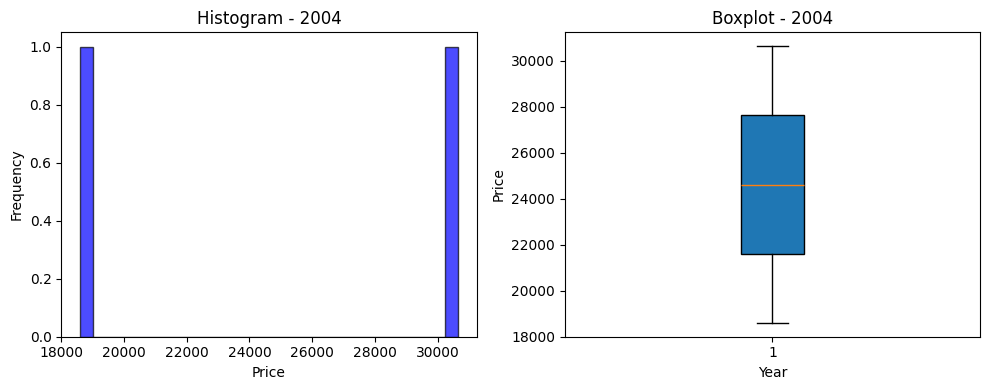

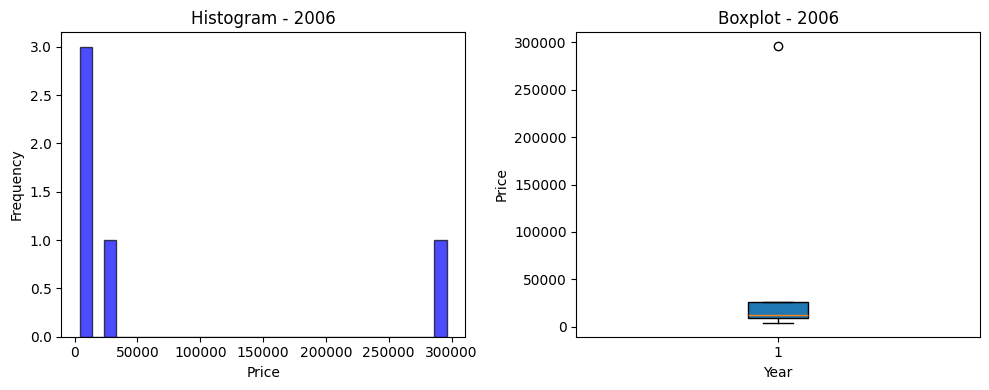

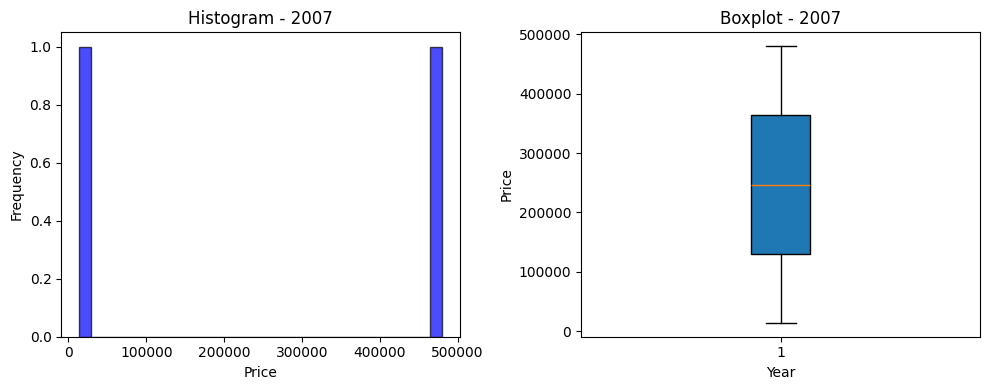

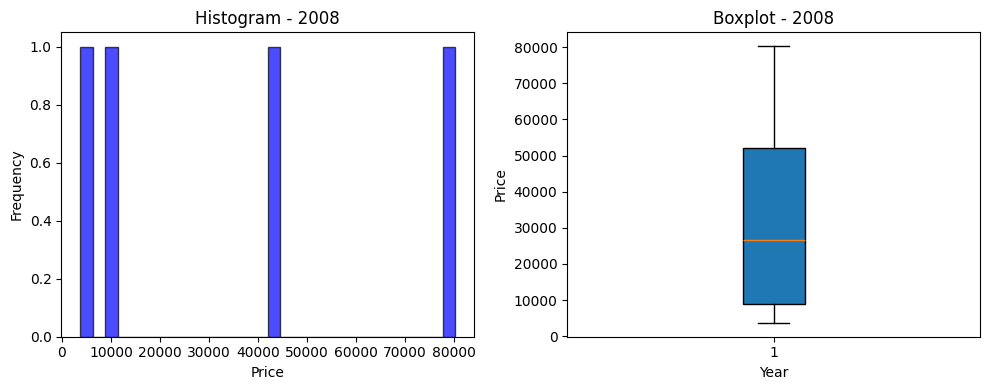

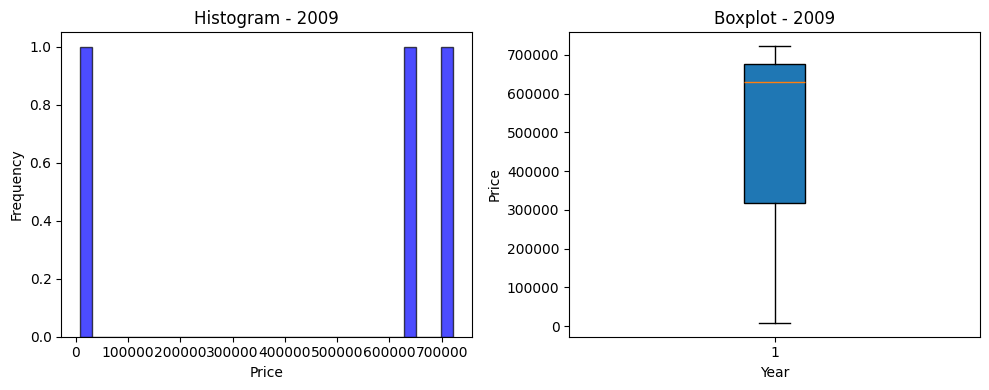

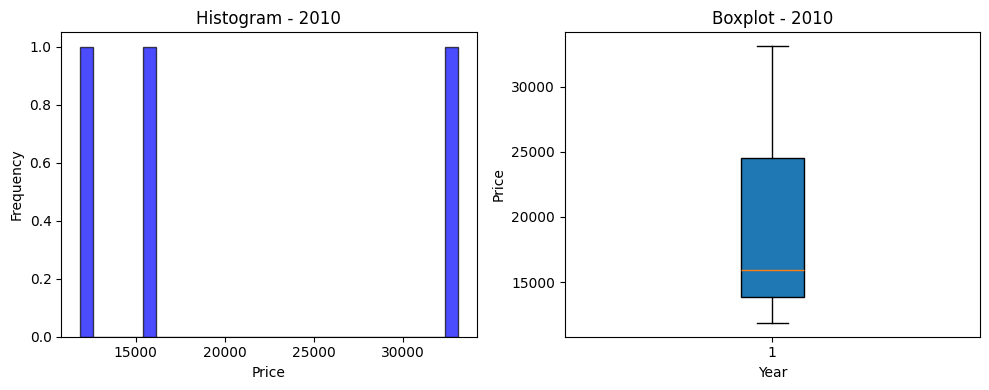

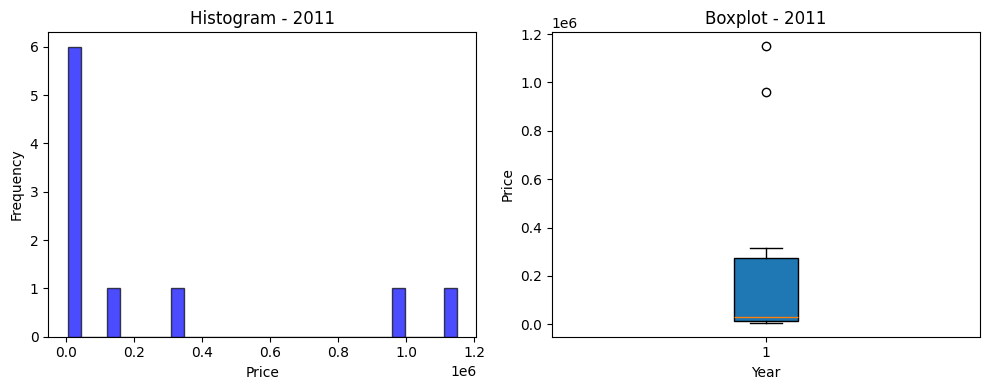

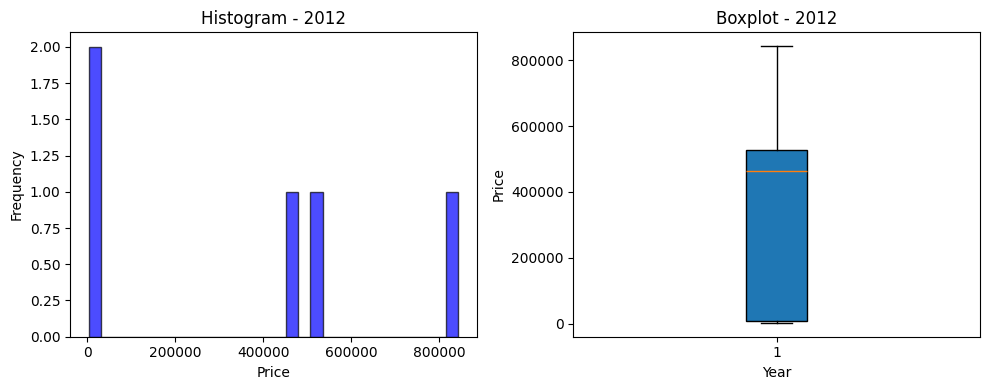

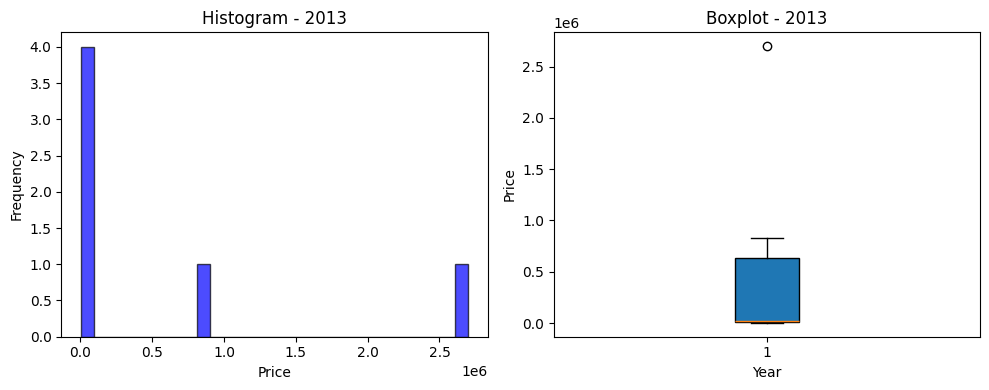

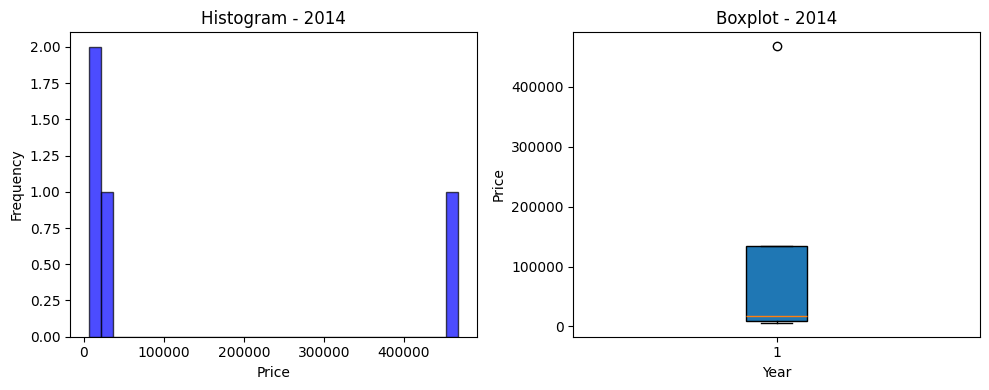

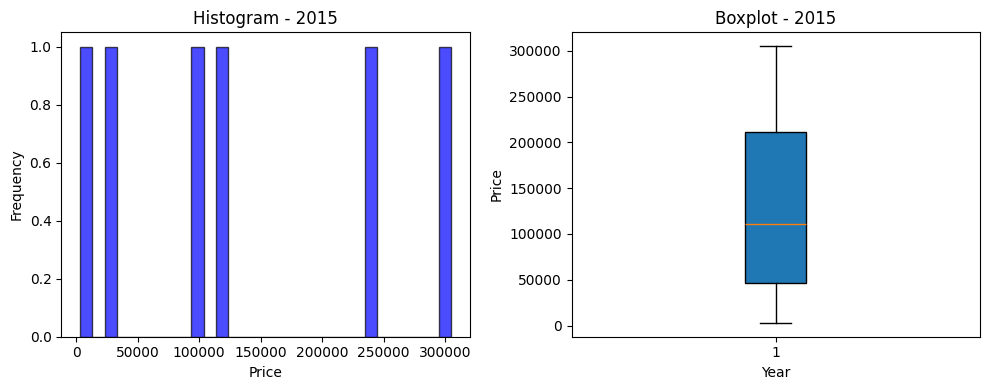

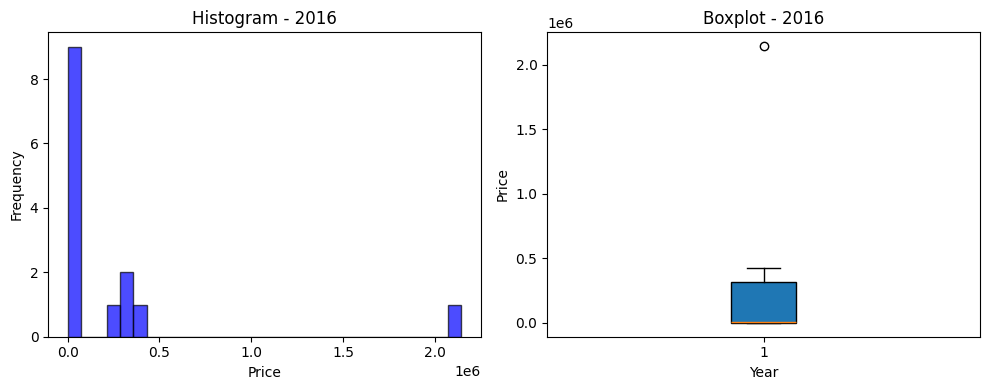

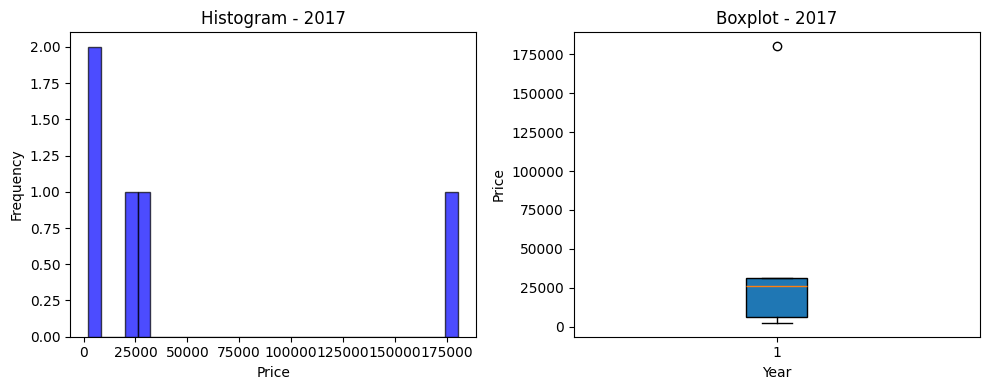

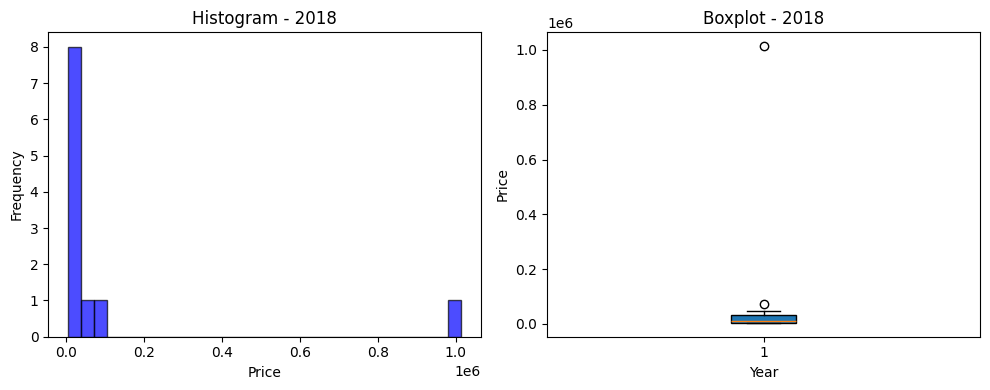

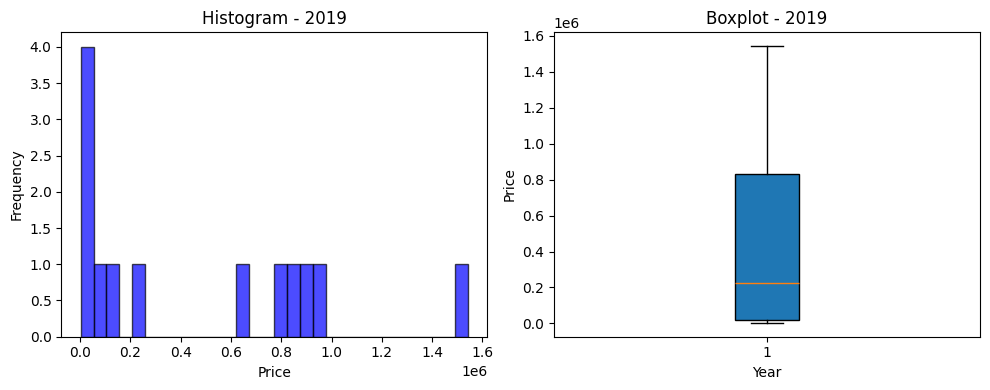

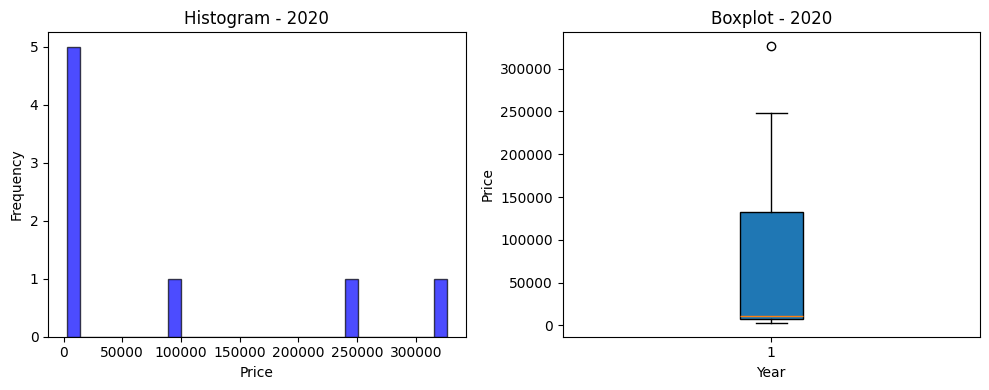

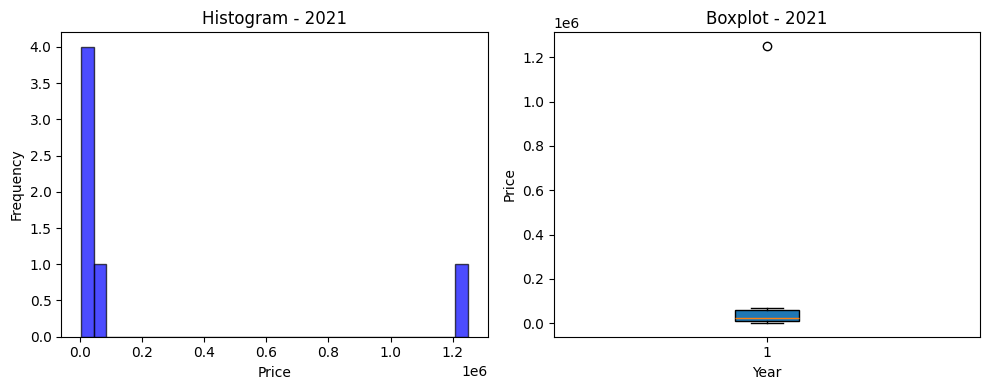

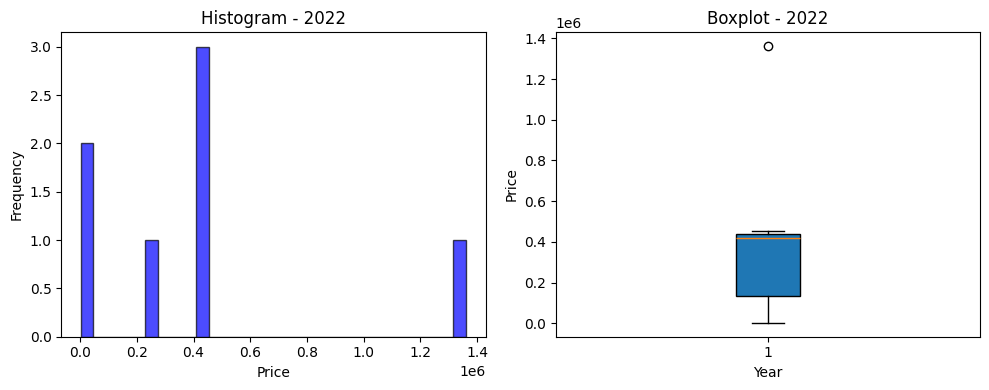

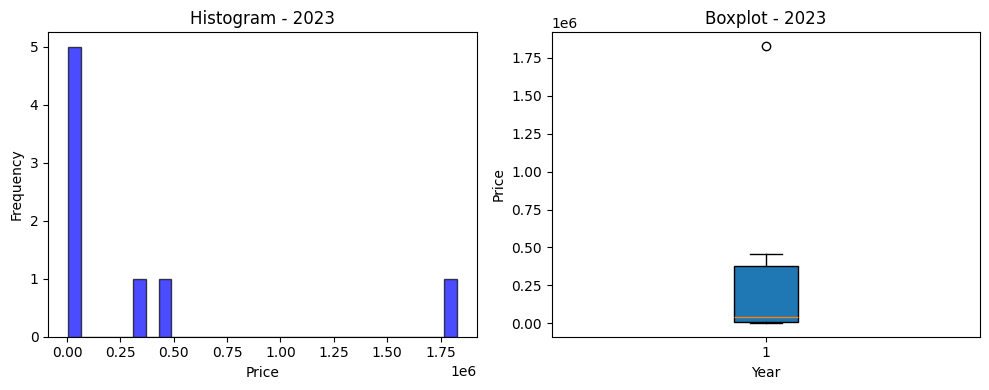

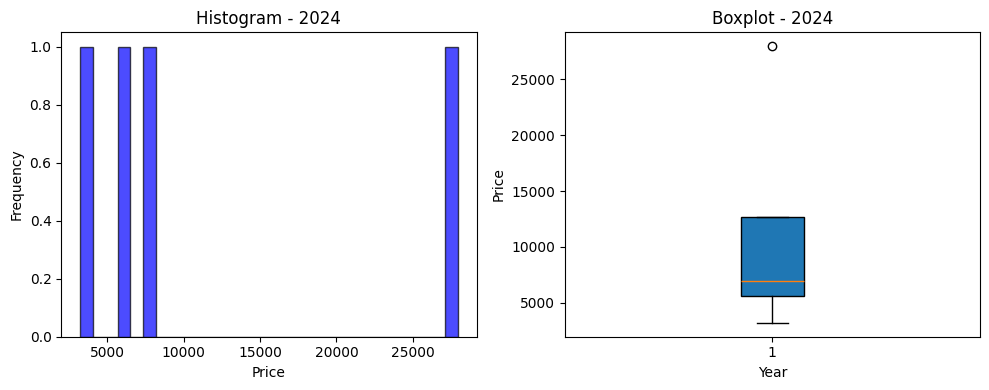

In [16]:

def getAveragePricePerYear(df):

    # 결측치 제거
    df = df.dropna(subset=['price_USD'])

    # # 날짜에서 연도 추출 (날짜 컬럼이 'date'로 가정)
    df['year'] = pd.to_datetime(df['end_date']).dt.year

    # # 년도별 그룹화
    grouped = df.groupby('year')

    average_prices = {}

    # # 각 년도별 데이터 처리
    for year, group in grouped:
        prices = group['price_USD'].astype(float)  # 숫자로 변환

        # 정규분포 기반 하위 30%, 상위 30% 필터링
        lower_bound = np.percentile(prices, 30)
        upper_bound = np.percentile(prices, 70)
        filtered_prices = prices[(prices >= lower_bound) & (prices <= upper_bound)]

        # 남은 데이터의 평균 계산
        if not filtered_prices.empty:
            average_prices[year] = filtered_prices.mean()
            
        # **년도별 가격 분포도 개별 그리기**
        plt.figure(figsize=(10, 4))

        # 히스토그램 (빈도수)
        plt.subplot(1, 2, 1)
        plt.hist(prices, bins=30, alpha=0.7, color='b', edgecolor='black')
        plt.xlabel("Price")
        plt.ylabel("Frequency")
        plt.title(f"Histogram - {year}")

        # 박스플롯 (이상치 포함)
        plt.subplot(1, 2, 2)
        plt.boxplot(prices, vert=True, patch_artist=True)
        plt.xlabel("Year")
        plt.ylabel("Price")
        plt.title(f"Boxplot - {year}")

        plt.tight_layout()
        plt.show()

    # 데이터프레임 변환
    avg_df = pd.DataFrame(list(average_prices.items()), columns=['Year', 'Average Price'])
    return avg_df

# 실행
# average_df = getAveragePricePerYear()
avg_df = getAveragePricePerYear(df)

    Year  Average Price
0   2006   12000.000000
1   2008   26726.000000
2   2009  629462.000000
3   2010   15910.700000
4   2011   59206.212500
5   2012  464129.393000
6   2013   20480.100000
7   2014   17322.641900
8   2015  110918.000000
9   2016   43461.970833
10  2017   26016.000000
11  2018    9884.927120
12  2019  381011.136000
13  2020   11582.406340
14  2021   24590.395950
15  2022  368057.483333
16  2023   43151.132900
17  2024    6996.500000


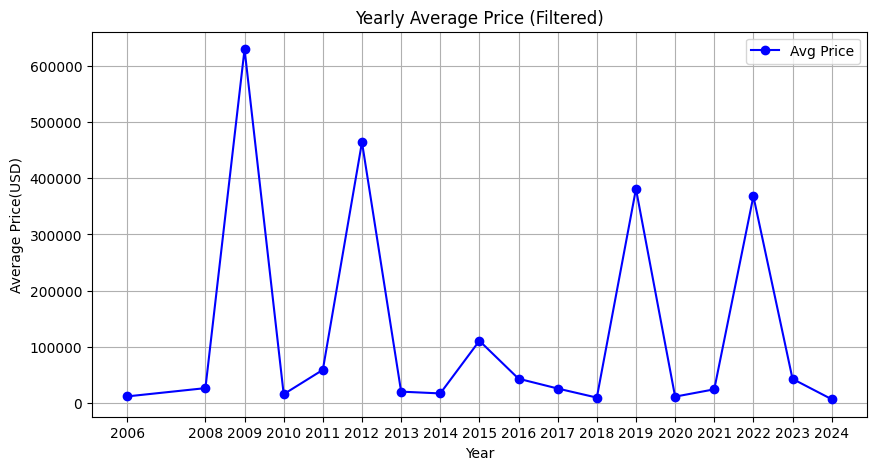

In [17]:
print(avg_df)
plt.figure(figsize=(10, 5))
plt.plot(avg_df['Year'], avg_df['Average Price'], marker='o', linestyle='-', color='b', label='Avg Price')
plt.xlabel("Year")
plt.ylabel("Average Price(USD)")
plt.title("Yearly Average Price (Filtered)")
plt.xticks(avg_df['Year'])  # 📌 x축 년도 고정
plt.legend()
plt.grid(True)
plt.show()